In [2]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.ppo.policies import MlpPolicy
from utils.adversary_env import AdversaryEnv
from utils.cartpole_wrapper import CartPoleWrapper
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Load target model
target_model = PPO.load("../ppo/models/cartpole-v1/cartpole_v1_ppo_510K")

In [4]:
# Test target model - for info on why the env is wrapped with Monitor check the evaluate_policy function
mean_reward, std_reward = evaluate_policy(target_model, Monitor(CartPoleWrapper(gym.make('CartPole-v1'))), n_eval_episodes=50)
print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward: 490.85 +/- 1.92


In [3]:
# Create adversary with adversary env
adversary_env = AdversaryEnv(CartPoleWrapper(gym.make('CartPole-v1')), target_model)
adversary = PPO(MlpPolicy, adversary_env, verbose=1)

In [4]:
# Train adversary
# log_dir = "./out/training-log/"
# log_path = log_dir + f"adversary-lunarlander-v2/"
# save_dir = "./models/adversary-lunarlander-v2/"

# timesteps = 50000

# adversary.learn(
#         total_timesteps=timesteps,
#         callback=None,
#         log_interval=-1,
#         eval_env=adversary_env, 
#         eval_freq=5000, 
#         n_eval_episodes=100,
#         tb_log_name='PPO',
#         eval_log_path=log_path, 
#         reset_num_timesteps=False
#         )

# # Save adversary
# adversary.save(save_dir + f"adversary_lunarlander_v2_{timesteps}")

In [5]:
# Load adversary
save_dir = "./models/adversary-lunarlander-v2/"

adversary = PPO.load(save_dir + f"adversary_lunarlander_v2_50000")
adversary_env = AdversaryEnv('LunarLander-v2', target_model)

In [6]:
import numpy as np
import pandas as pd
from uniform_attack import UniformAttack

# Evaluate uniform adversarial attack over different epsilon
data_dict = {
    'epsilon': [],
    'mean_rew': [],
    'mean_perturbation': [],
    'mean_n_timesteps': [],
    'mean_n_attacks': []
}

n_episodes = 50

for j in range(1, 50):
    epsilon = j/100

    all_episodes_rewards = []
    all_episodes_perturbation = []
    all_episodes_n_timesteps = []
    all_episodes_n_attacks = []

    for i in range(0, n_episodes):
        # Run attack on a2c model
        env = gym.make("LunarLander-v2")
        ua = UniformAttack(env=env, model=target_model, attack=adversary, epsilon=epsilon)
        ua.perform_attack()

        all_episodes_rewards.append(ua.reward_total)
        all_episodes_perturbation.append(ua.perturbation_total)
        all_episodes_n_timesteps.append(ua.frames_count)
        all_episodes_n_attacks.append(ua.n_attacks)

        ua.reset_attack()

    data_dict['epsilon'].append(epsilon)
    data_dict['mean_rew'].append(np.round(np.mean(all_episodes_rewards), 2))
    data_dict['mean_perturbation'].append(np.round(np.mean(all_episodes_perturbation), 2))
    data_dict['mean_n_timesteps'].append(np.round(np.mean(all_episodes_n_timesteps), 2))
    data_dict['mean_n_attacks'].append(np.round(np.mean(all_episodes_n_attacks), 2))

    print("------------------------------------------")
    print(
        f"{data_dict['epsilon'][-1] = }: \n" +
        f"{data_dict['mean_rew'][-1] = }, \n" +
        f"{data_dict['mean_perturbation'][-1] = } \n" +
        f"{data_dict['mean_n_timesteps'][-1] = } \n" +
        f"{data_dict['mean_n_attacks'][-1] = }"
        )
    print("------------------------------------------")

------------------------------------------
data_dict['epsilon'][-1] = 0.01: 
data_dict['mean_rew'][-1] = 222.55, 
data_dict['mean_perturbation'][-1] = 2.75 
data_dict['mean_n_timesteps'][-1] = 313.0 
data_dict['mean_n_attacks'][-1] = 313.0
------------------------------------------
------------------------------------------
data_dict['epsilon'][-1] = 0.02: 
data_dict['mean_rew'][-1] = 146.15, 
data_dict['mean_perturbation'][-1] = 5.96 
data_dict['mean_n_timesteps'][-1] = 335.48 
data_dict['mean_n_attacks'][-1] = 335.48
------------------------------------------
------------------------------------------
data_dict['epsilon'][-1] = 0.03: 
data_dict['mean_rew'][-1] = 107.39, 
data_dict['mean_perturbation'][-1] = 11.61 
data_dict['mean_n_timesteps'][-1] = 430.48 
data_dict['mean_n_attacks'][-1] = 430.48
------------------------------------------
------------------------------------------
data_dict['epsilon'][-1] = 0.04: 
data_dict['mean_rew'][-1] = 61.4, 
data_dict['mean_perturbation'][-1]

In [7]:
print(data_dict)

{'epsilon': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49], 'mean_rew': [222.55, 146.15, 107.39, 61.4, 37.74, 26.65, 17.91, 16.8, 8.41, 6.58, 0.6, 5.5, -1.2, -14.92, -17.15, -18.43, -25.94, -29.67, -33.27, -32.5, -41.66, -46.43, -58.8, -53.97, -66.7, -66.6, -72.69, -87.07, -86.46, -104.42, -99.49, -110.84, -116.69, -128.03, -122.86, -165.77, -138.79, -153.12, -167.31, -166.02, -190.33, -189.44, -202.05, -212.15, -216.17, -227.84, -221.72, -252.27, -240.87], 'mean_perturbation': [2.75, 5.96, 11.61, 10.1, 6.82, 6.74, 8.06, 9.19, 8.48, 9.25, 9.86, 11.07, 12.0, 12.86, 13.07, 14.25, 14.71, 15.06, 16.39, 16.67, 18.18, 18.15, 17.98, 19.92, 20.9, 20.91, 23.13, 23.52, 24.51, 25.27, 25.97, 27.3, 27.81, 28.64, 28.99, 31.62, 31.98, 31.72, 33.31, 33.32, 33.62

In [8]:
# Create DataFrame
labels = ['epsilon', 'mean_rew', 'mean_perturbation', 'mean_n_timsteps', 'mean_n_attacks']

data_df = pd.DataFrame(
        data_dict, 
        columns=labels,
        )
data_df.set_index('epsilon', inplace=True)

# Save data as .csv file
with open("./out/data/" + "uniform_attack_epsilon", 'w') as f:
    data_df.to_csv(f)

data_df

,mean_rew,mean_perturbation,mean_n_timsteps,mean_n_attacks
epsilon,,,,
0.01,222.55,2.750000,NaN,313.00
0.02,146.15,5.960000,NaN,335.48
0.03,107.39,11.610000,NaN,430.48
0.04,61.40,10.100000,NaN,280.98
0.05,37.74,6.820000,NaN,150.48
0.06,26.65,6.740000,NaN,125.08
0.07,17.91,8.060000,NaN,126.98
0.08,16.80,9.190000,NaN,125.92
0.09,8.41,8.480000,NaN,103.80


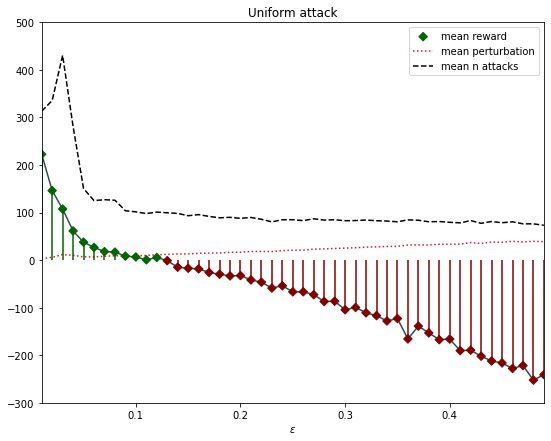

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load data
with open("./out/data/" + "uniform_attack_epsilon", 'r') as f:
    data_df = pd.read_csv(f, index_col=0)

# Plot data_df
plt.figure(figsize=(9,7))
plt.plot(data_df.index, data_df['mean_rew'], color='darkslategray', alpha=1, zorder=0)
plt.vlines(data_df.index, ymin=0, ymax=data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), alpha=1, zorder=1)
plt.scatter(data_df.index, data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), label='mean reward', marker='D', alpha=1, zorder=2)

plt.plot(data_df.index, data_df['mean_perturbation'], label='mean perturbation', color='crimson', linestyle='dotted', alpha=1, zorder=0)

# plt.plot(data_df.index, data_df['mean_n_timesteps'], label='mean n timesteps', color='purple', linestyle='dotted', alpha=1, zorder=0)

plt.plot(data_df.index, data_df['mean_n_attacks'], label='mean n attacks', color='black', linestyle='dashed', alpha=1, zorder=0)

plt.title("Uniform attack")
plt.legend()
plt.xlabel('$\epsilon$')
# plt.ylabel()
plt.axis([0.01, 0.49, -300, 500]) # plt.axis([xmin, xmax, ymin, ymax])
plt.show()